In [ ]:
from PIL import Image

pivot = Image.open('pivot1.JPG')
start = Image.open('start.JPG')
end = Image.open('end.JPG')

new_size = (540, 340)
pivot = pivot.resize(new_size)
start = start.resize(new_size)
end = end.resize(new_size)

In [ ]:
import cv2
import matplotlib.pyplot as plt

def matchAB(fileA, fileB):
    # 画像の読み込み
    imgA = cv2.imread(fileA)
    imgB = cv2.imread(fileB)

    # グレー変換
    grayA = cv2.cvtColor(imgA, cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(imgB, cv2.COLOR_BGR2GRAY)

    # AKAZE特徴量の抽出
    akaze = cv2.AKAZE_create()
    kpA, desA = akaze.detectAndCompute(grayA, None)
    kpB, desB = akaze.detectAndCompute(grayB, None)

    # BFMatcherの定義と画像化
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(desB, desB)
    matches = sorted(matches, key=lambda x: x.distance)
    matched_image = cv2.drawMatches(imgA, kpA, imgB, kpB, matches, None, flags=2)

    # 表示
    plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))
    plt.show()

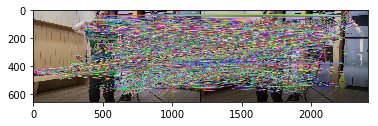

In [ ]:
matchAB("pivot1.png", "pivot2.png")

In [ ]:
import numpy as np
def matchAB(fileA, fileB):
    # 画像の読み込み
    imgA = cv2.imread(fileA)
    imgB = cv2.imread(fileB)

    # グレー変換
    grayA = cv2.cvtColor(imgA, cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(imgB, cv2.COLOR_BGR2GRAY)

    # 画像サイズの取得
    height, width = grayA.shape
    # 部分画像を作って、マッチングさせる
    result_window = np.zeros((height, width), dtype=imgA.dtype)
    for start_y in range(0, height-100, 50):
        for start_x in range(0, width-100, 50):
            window = grayA[start_y:start_y+100, start_x:start_x+100]
            match = cv2.matchTemplate(grayB, window, cv2.TM_CCOEFF_NORMED)
            _, _, _, max_loc = cv2.minMaxLoc(match)
            matched_window = grayB[max_loc[1]:max_loc[1]+100, max_loc[0]:max_loc[0]+100]
            result = cv2.absdiff(window, matched_window)
            result_window[start_y:start_y+100, start_x:start_x+100] = result

    plt.imshow(result_window)

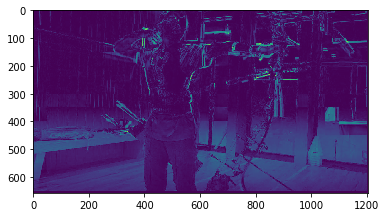

In [ ]:
matchAB("pivot1.JPG", "pivot2.JPG")

In [ ]:
def matchAB(fileA, fileB):
    # 画像の読み込み
    imgA = cv2.imread(fileA)
    imgB = cv2.imread(fileB)

    # グレー変換
    grayA = cv2.cvtColor(imgA, cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(imgB, cv2.COLOR_BGR2GRAY)

    # 画像サイズの取得
    height, width = grayA.shape
    # 部分画像を作って、マッチングさせる
    result_window = np.zeros((height, width), dtype=imgA.dtype)
    for start_y in range(0, height-100, 50):
        for start_x in range(0, width-100, 50):
            window = grayA[start_y:start_y+100, start_x:start_x+100]
            match = cv2.matchTemplate(grayB, window, cv2.TM_CCOEFF_NORMED)
            _, _, _, max_loc = cv2.minMaxLoc(match)
            matched_window = grayB[max_loc[1]:max_loc[1]+100, max_loc[0]:max_loc[0]+100]
            result = cv2.absdiff(window, matched_window)
            result_window[start_y:start_y+100, start_x:start_x+100] = result

    # マッチングした結果できた差分画像の輪郭を抽出し、四角で囲む
    _, result_window_bin = cv2.threshold(result_window, 127, 255, cv2.THRESH_BINARY)
    _, contours, _ = cv2.findContours(result_window_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    imgC = imgA.copy()
    for contour in contours:
        min = np.nanmin(contour, 0)
        max = np.nanmax(contour, 0)
        loc1 = (min[0][0], min[0][1])
        loc2 = (max[0][0], max[0][1])
        cv2.rectangle(imgC, loc1, loc2, 255, 2)

    # 画像表示する
    plt.subplot(1, 3, 1), plt.imshow(cv2.cvtColor(imgA, cv2.COLOR_BGR2RGB)), plt.title('A'), plt.xticks([]), plt.yticks([])
    plt.subplot(1, 3, 2), plt.imshow(cv2.cvtColor(imgB, cv2.COLOR_BGR2RGB)), plt.title('B'), plt.xticks([]), plt.yticks([])
    plt.subplot(1, 3, 3), plt.imshow(cv2.cvtColor(imgC, cv2.COLOR_BGR2RGB)), plt.title('Answer'), plt.xticks([]), plt.yticks([])
    plt.show()

    cv2.imwrite('answer.png', cv2.cvtColor(imgC, cv2.COLOR_BGR2RGB))

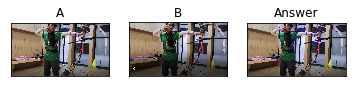

In [ ]:
matchAB("pivot1.png", "pivot2.png")

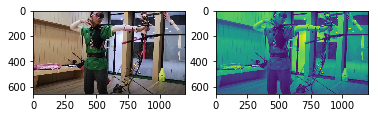

In [ ]:
import cv2

img = cv2.imread('pivot1.JPG', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# cv2.imwrite('result.jpg', gray_img)
plt.subplot(1,2,1); plt.imshow(img)
plt.subplot(1,2,2); plt.imshow(gray_img)
plt.show()

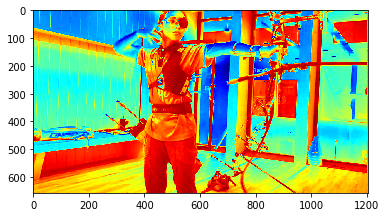

In [ ]:
heatmap_img = cv2.applyColorMap(gray_img, cv2.COLORMAP_JET)
# cv2.imwrite('result.jpg', heatmap_img)
plt.imshow(heatmap_img)
plt.show()

In [ ]:
import os

os.mkdir('./frames')

In [ ]:
import cv2
import os
vidcap = cv2.VideoCapture('rc.mp4')
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite(os.path.join('./frames/', "%d.jpg" % count), image)     # save frame as JPEG file 
  success,image = vidcap.read()
  print('Read a new frame: ', success)
  count += 1

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

TARGET_FILE: pivot1.JPG
TARGET_FILE: start.JPG
TARGET_FILE: end.JPG


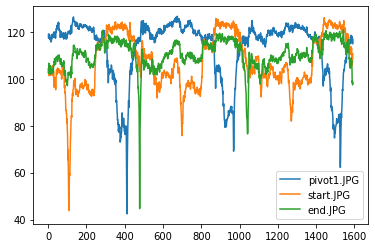

In [ ]:
#!/usr/bin/env python
# -*- coding: UTF-8 -*-

"""feature detection."""

import cv2
import os
import matplotlib.pyplot as plt
from natsort import natsorted
import numpy as np

# IMG_DIR = os.path.abspath(os.path.dirname(__file__)) + './'
IMG_DIR = './frames/'
IMG_SIZE = (200, 200)

for _file in ['pivot1.JPG', 'start.JPG', 'end.JPG']:
  
  TARGET_FILE = _file
  target_img_path = TARGET_FILE
  target_img = cv2.imread(target_img_path, cv2.IMREAD_GRAYSCALE)
  target_img = cv2.resize(target_img, IMG_SIZE)
  
  bf = cv2.BFMatcher(cv2.NORM_HAMMING)
  # detector = cv2.ORB_create()
  detector = cv2.AKAZE_create()
  (target_kp, target_des) = detector.detectAndCompute(target_img, None)
  
  print('TARGET_FILE: %s' % (TARGET_FILE))
  
  files = os.listdir(IMG_DIR)
  files = natsorted(files)
  ret = []
  rep = []
  count = 0
  for file in files:
      if file == '.DS_Store' or file == TARGET_FILE:
          continue
  
      comparing_img_path = os.path.join(IMG_DIR + file)
      try:
          comparing_img = cv2.imread(comparing_img_path, cv2.IMREAD_GRAYSCALE)
          comparing_img = cv2.resize(comparing_img, IMG_SIZE)
          (comparing_kp, comparing_des) = detector.detectAndCompute(comparing_img, None)
          matches = bf.match(target_des, comparing_des)
          dist = [m.distance for m in matches]
          ret.append(sum(dist) / len(dist))
          count += 1
          rep.append(count)
      except cv2.error:
          ret = 100000
  
  # print(ret)
  x = np.array(rep)
  y = np.array(ret)
  plt.plot(x, y, label=_file)

plt.legend()
plt.show()
      # print(ret)
      # if(ret < 70)
      #   print(file, ret)

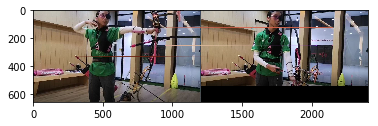

In [ ]:
import matplotlib.pyplot as plt

def show_imgs_match():
	img1 = cv2.imread('./pivot1.JPG')
	img2 = cv2.imread('./non-pivot.JPG')
	gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
	gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
	akaze = cv2.ORB_create()
	kp1, des1 = akaze.detectAndCompute(gray1, None)
	kp2, des2 = akaze.detectAndCompute(gray2, None)

	bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
	matches = bf.match(des1, des2)
	matches = sorted(matches, key = lambda x:x.distance)
	img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=2)
	plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
	plt.show()

show_imgs_match()